### 1 文本预处理
分别对正面情感和负面情感的发帖文本分词并删除停用词

In [31]:
import jieba
# 创建停用词list
def stopwordslist(filepath):
    stopwords = [line.strip() for line in open(filepath, 'r', encoding='utf-8').readlines()]
    return stopwords
# 对句子进行分词
def seg_sentence(sentence):
    sentence_seged = jieba.cut(sentence.strip())
    stopwords = stopwordslist('C:/Users/Sandra/Desktop/文本分析/stopwords.txt')  # 这里加载停用词的路径
    outstr = ''
    for word in sentence_seged:
        if word not in stopwords:
            if word != '\t':
                outstr += word
                outstr += " "
    return outstr
#读入需要分词的文件
inputs = open('C:/Users/Sandra/Desktop/文本分析/文心positive.txt', 'r', encoding='utf-8')
#输出分词结果
outputs = open('C:/Users/Sandra/Desktop/文本分析/positive_fenci.txt', 'w',encoding='utf-8')
for line in inputs:
    line_seg = seg_sentence(line)  # 这里的返回值是字符串
    outputs.write(line_seg + '\n')
outputs.close()
inputs.close()


### 2 LDA主题模型
分别对正面情感和负面情感的发帖文本分词并删除停用词

In [28]:
from gensim import corpora
from gensim.models import LdaModel
from gensim import models
from gensim.corpora import Dictionary
train = []
fp = open('C:/Users/Sandra/Desktop/文本分析/positive_fenci.txt','r',encoding='utf8')
for line in fp:
    line = line.split()
    train.append([ w for w in line  ])

dictionary = corpora.Dictionary(train)
corpus = [ dictionary.doc2bow(text) for text in train ]
tfidf = models.TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]
sum=5#主题个数
lda = LdaModel(corpus=corpus, id2word=dictionary, num_topics=sum,passes=20)

corpus_lda = lda[corpus_tfidf]
lcorpus_tfidf = list(corpus_lda)


#输出主题以及各主题关键词
for topic in lda.print_topics(num_words = 10):
    termNumber = topic[0]
    print(topic[0], ':', sep='')
    listOfTerms = topic[1].split('+')
    for term in listOfTerms:
        listItems = term.split('*')
        print('  ', listItems[1], '(', listItems[0], ')', sep='')


0:
  "求助" (0.065)
  "血糖" ( 0.061)
  "!" ( 0.025)
  "空腹" ( 0.017)
  "请" ( 0.015)
  "请教" ( 0.013)
  "控制" ( 0.011)
  "月" ( 0.009)
  "帮" ( 0.008)
  "运动"( 0.008)
1:
  "血糖" (0.031)
  "小时" ( 0.015)
  "血糖仪" ( 0.014)
  "求助" ( 0.013)
  "低血糖" ( 0.012)
  "餐后" ( 0.011)
  "买" ( 0.010)
  "做" ( 0.009)
  "糖化" ( 0.008)
  "影响"( 0.006)
2:
  "糖尿病" (0.111)
  "胰岛素" ( 0.045)
  "型" ( 0.022)
  "治疗" ( 0.019)
  "患者" ( 0.015)
  "有没有" ( 0.007)
  "注射" ( 0.007)
  "发现" ( 0.007)
  "并发症" ( 0.007)
  "情况"( 0.006)
3:
  "说" (0.017)
  "糖友" ( 0.012)
  "家园" ( 0.006)
  "泵" ( 0.006)
  "DM" ( 0.006)
  "照片" ( 0.005)
  "现象" ( 0.005)
  "血糖仪" ( 0.005)
  "女儿" ( 0.005)
  "东西"( 0.005)
4:
  "吃" (0.051)
  "血糖仪" ( 0.022)
  "试纸" ( 0.013)
  "糖尿病人" ( 0.013)
  "罗氏" ( 0.013)
  "饮食" ( 0.012)
  "二甲" ( 0.008)
  "胍" ( 0.007)
  "双" ( 0.007)
  "美敦力"( 0.005)


### 3 画词云图
分别对正面情感和负面情感的发帖文本分词结果绘制词云图

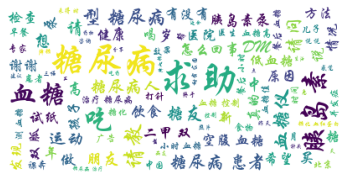

In [29]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import jieba
text = open("C:/Users/Sandra/Desktop/文本分析/positive_fenci.txt", "r",encoding='utf8').read()
# 设置词云
wc = WordCloud(background_color="white",  # 设置背景颜色
               # mask = "图片",  #设置背景图片
               max_words=100,  # 设置最大显示的字数
               # stopwords = "", #设置停用词
               font_path="C:/Users/Sandra/Desktop/文本分析/STXINGKA.TTF",
               # 设置中文字体，使得词云可以显示（词云默认字体是“DroidSansMono.ttf字体库”，不支持中文）
               max_font_size=50,  # 设置字体最大值
               random_state=30,  # 设置有多少种随机生成状态，即有多少种配色方案
               )
myword = wc.generate(text)  # 生成词云
# 展示词云图
plt.imshow(myword)
plt.axis("off")
plt.show()
